# VISUALIZACION
---

In [30]:
import pandas as pd
import numpy as np
import sidetable
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
plt.rcParams["figure.figsize"] = (10,8)
warnings.filterwarnings("ignore")

In [31]:
df = pd.read_csv("datos/02-bikes_sinoutliers.csv", index_col= 0).reset_index(drop= True)
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,winter,0,1,1,1,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-02-01,winter,0,2,0,4,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-03-01,winter,0,3,0,4,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-04-01,spring,0,4,0,7,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-05-01,spring,0,5,0,2,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      716 non-null    object 
 1   season      716 non-null    object 
 2   yr          716 non-null    int64  
 3   mnth        716 non-null    int64  
 4   holiday     716 non-null    int64  
 5   weekday     716 non-null    int64  
 6   workingday  716 non-null    int64  
 7   weathersit  716 non-null    int64  
 8   temp        716 non-null    float64
 9   atemp       716 non-null    float64
 10  hum         716 non-null    float64
 11  windspeed   716 non-null    float64
 12  casual      716 non-null    int64  
 13  registered  716 non-null    int64  
 14  cnt         716 non-null    int64  
dtypes: float64(4), int64(9), object(2)
memory usage: 84.0+ KB


In [33]:
# Volvemos a cambiar a category algunas columnas ya que se modifican al guardar y cargar
df[["yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]] = df[["yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]].astype("category")

### Distribución variable *Registered*

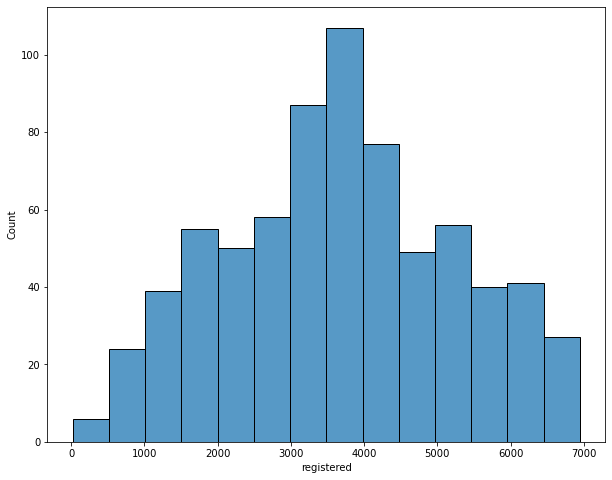

In [34]:
sns.histplot(data = df, x = "registered");

### Correlación

In [35]:
masc = np.triu(np.ones_like(df.corr(), dtype=np.bool_))

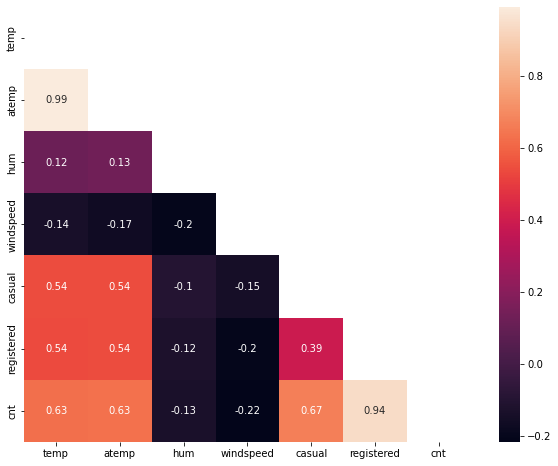

In [36]:
sns.heatmap(df.corr(), mask= masc, annot= True);

Podemos observar que se puede eliminar la columna temp o atemp, una de las 2

### Variables numéricas

In [37]:
# Hacemos una lista con las columnas que queremos comparar con la columna "registered"
lista_columnas = ["temp", "atemp", "hum", "windspeed"]

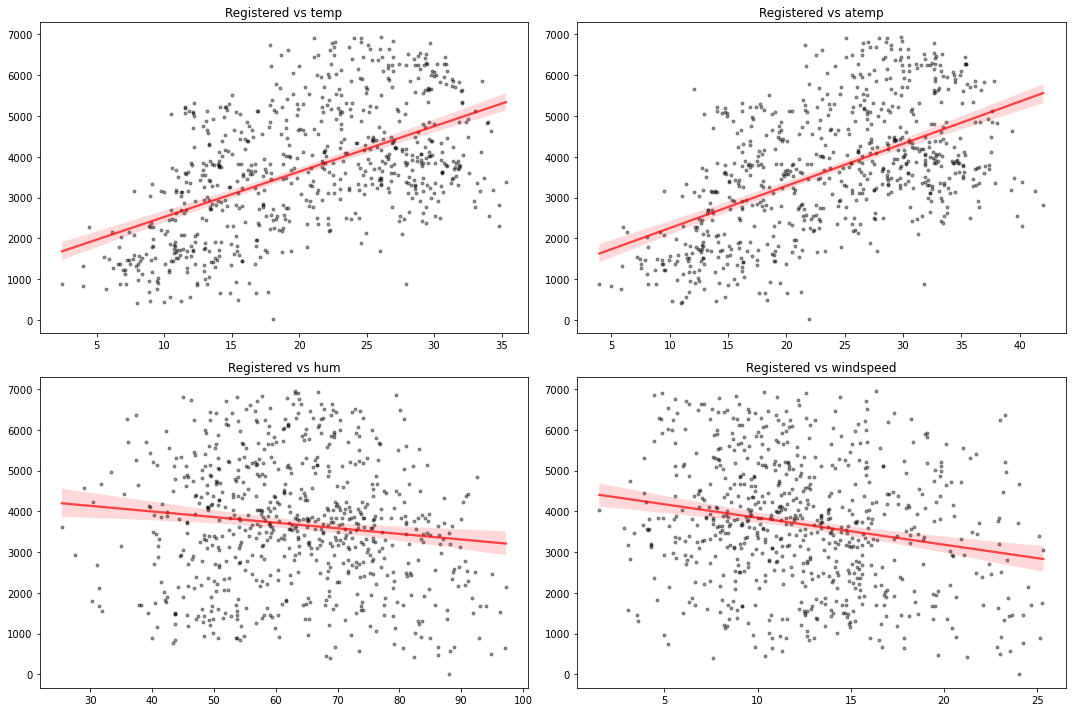

In [38]:
# Hacemos un regplot para compararlas con registered
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
axes = axes.flat

for i, colum in enumerate(lista_columnas):
    sns.regplot(
        x = df[colum],
        y = df["registered"],
        color = "black",
        marker = ".",
        scatter_kws = {"alpha": 0.4},
        line_kws = {"color": "red", "alpha": 0.7 },
        ax = axes[i])
    axes[i].set_title(f"Registered vs {colum}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
fig.tight_layout();

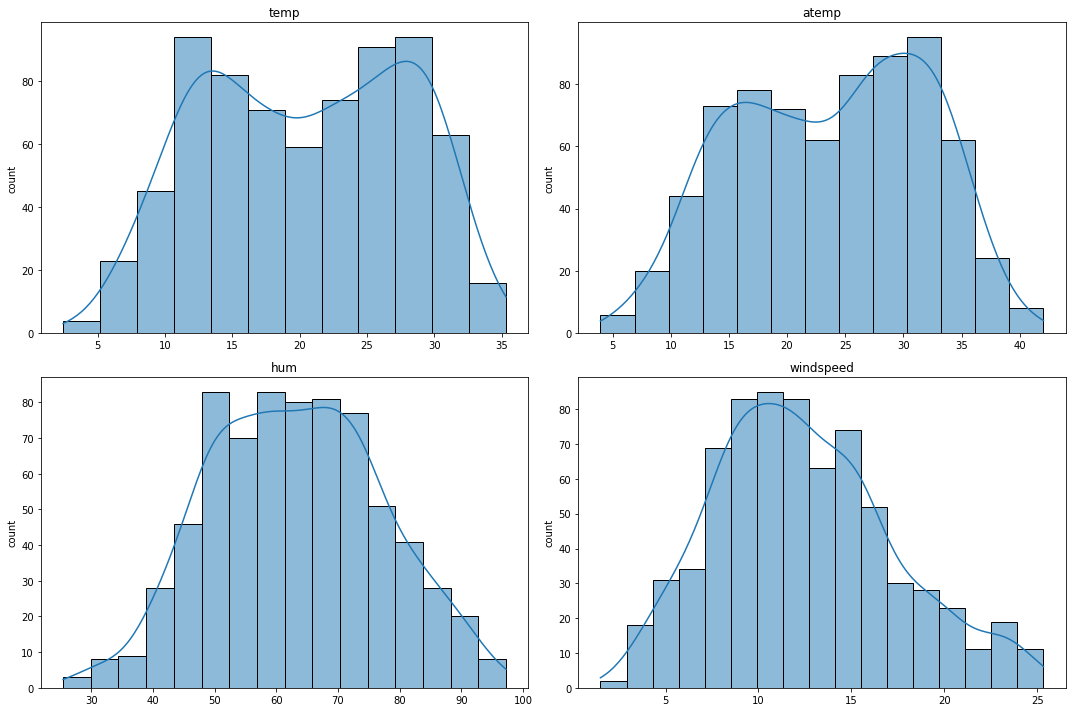

In [39]:
#Gráfico de distribución para cada variable numérica

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))

axes = axes.flat

for i, colum in enumerate(lista_columnas): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True,
        ax = axes[i])
    
    axes[i].set_title(colum)
    axes[i].tick_params()
    axes[i].set_xlabel("")
    axes[i].set_ylabel( "count")

fig.tight_layout();

### Variables categóricas

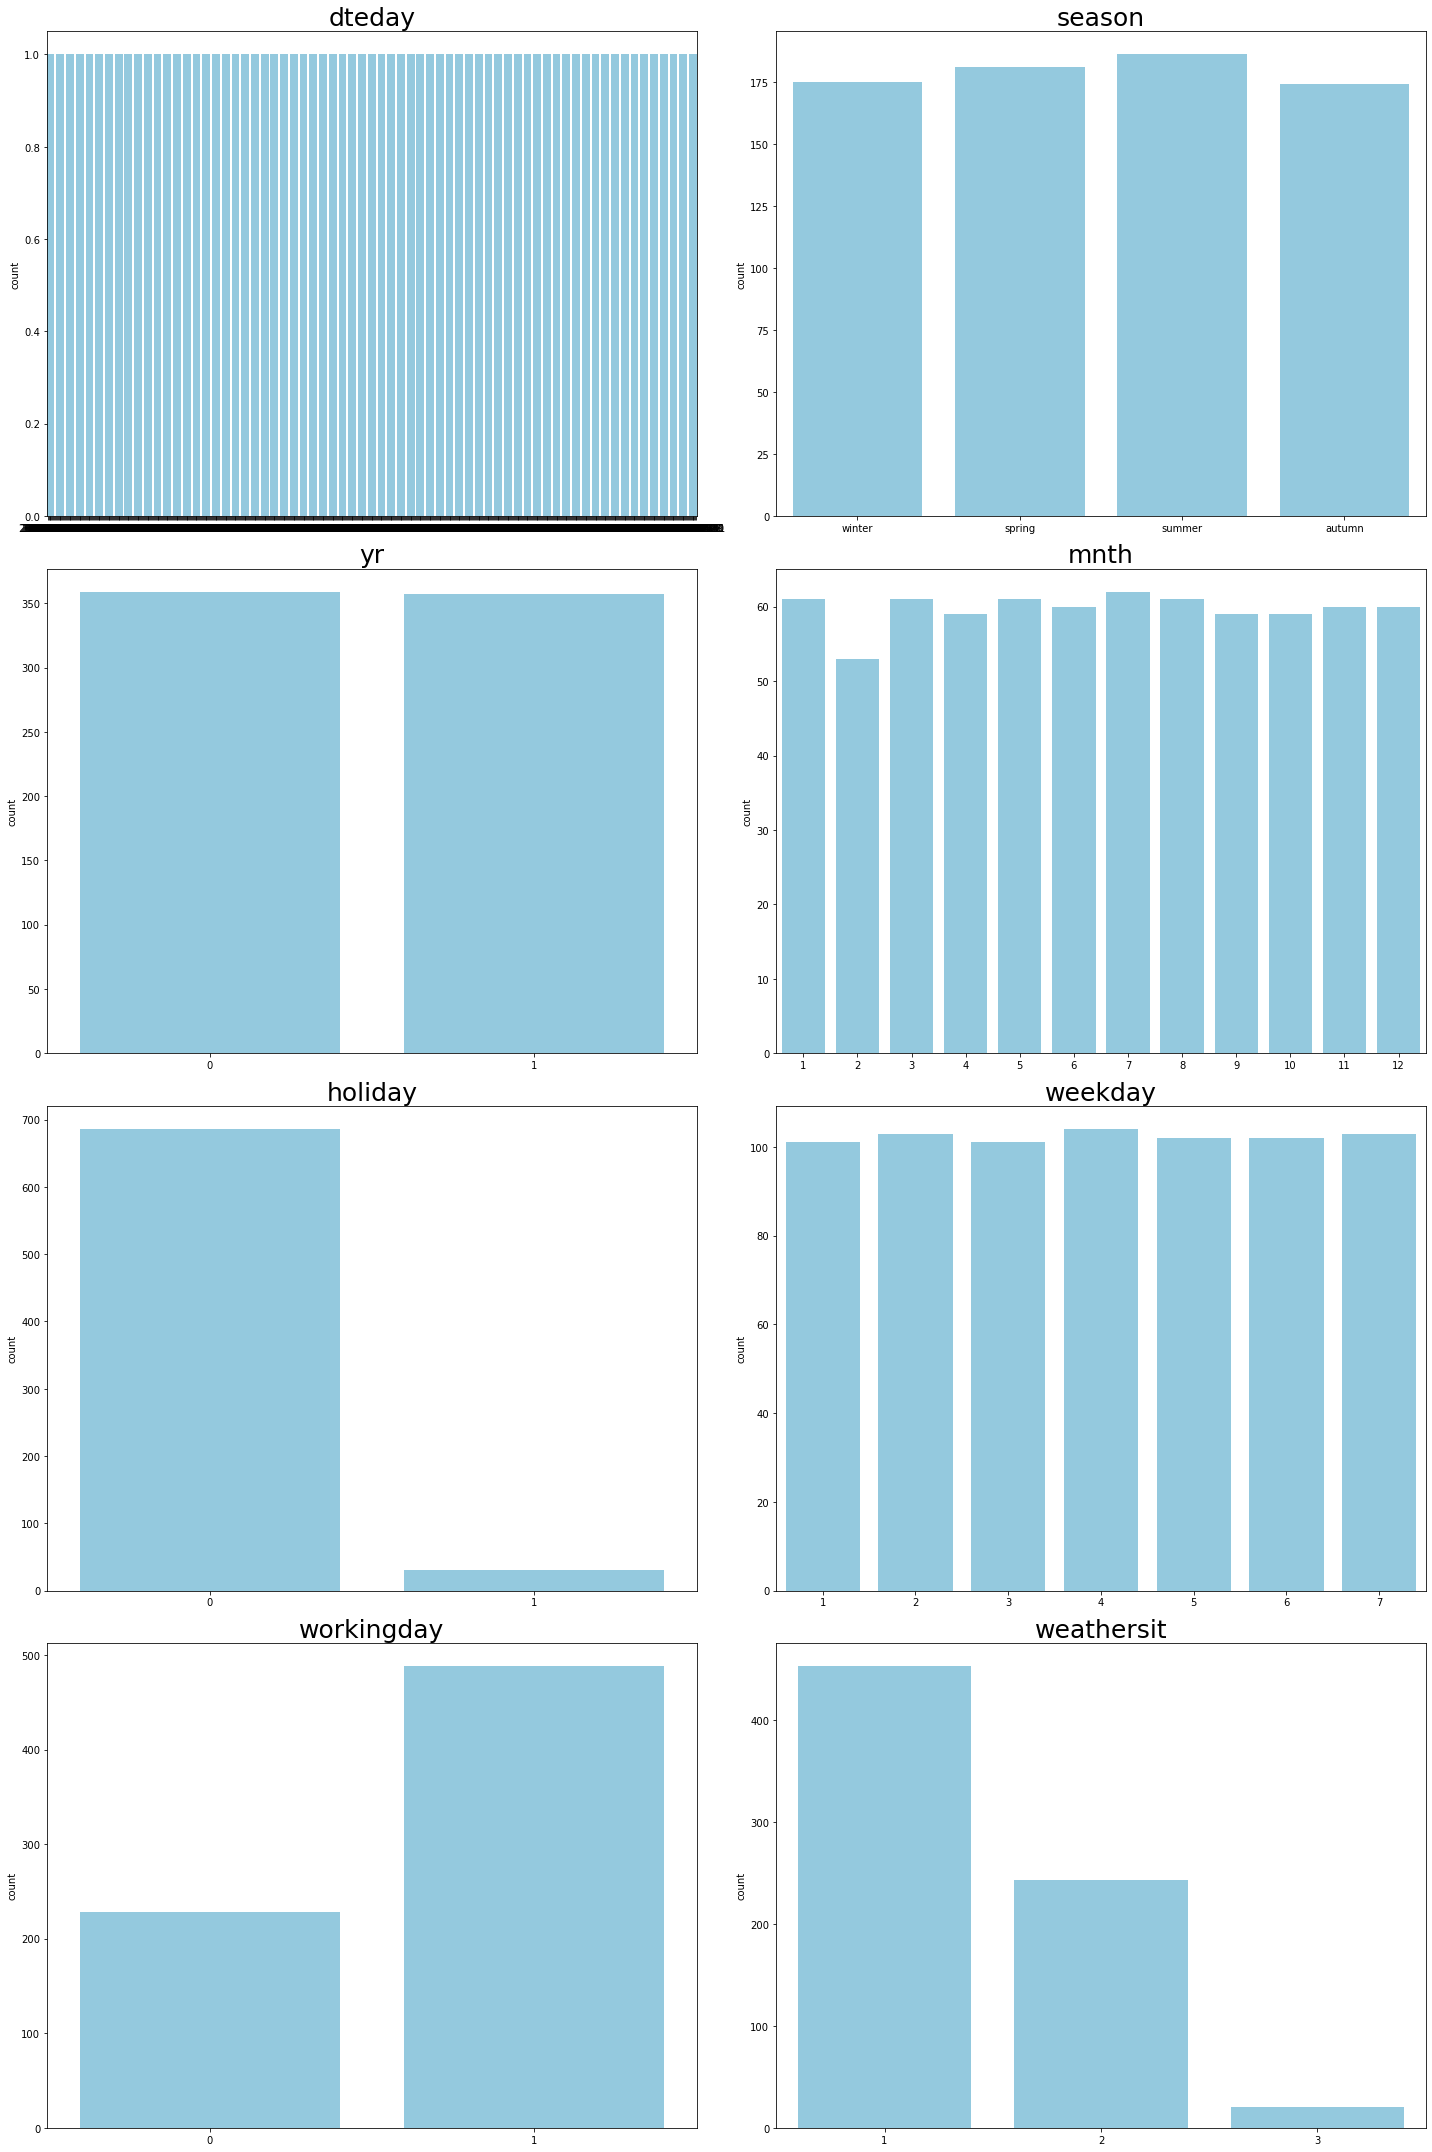

In [40]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (20, 30))

axes = axes.flat

columnas_cat = df.select_dtypes(include =['category','object']).columns

for i, colum in enumerate(columnas_cat): 
    sns.countplot(
        data = df,
        x = colum,
        color = "skyblue",
        ax = axes[i])
    
    axes[i].set_title(colum, fontsize = 25)
    axes[i].tick_params()
    axes[i].set_xlabel("")
    axes[i].set_ylabel( "count")

fig.tight_layout();

### Variables categóricas con **registered**

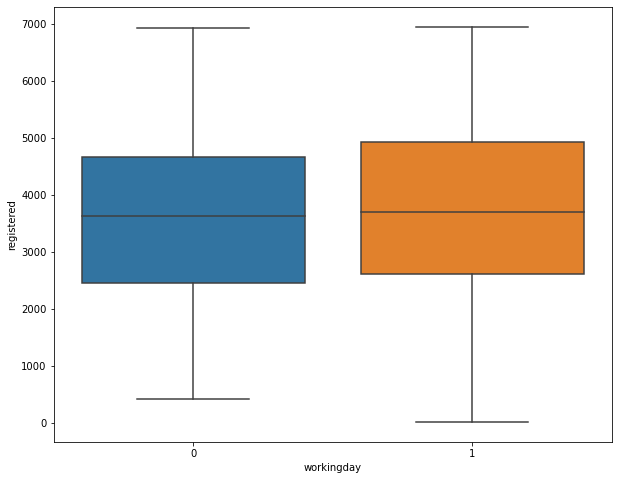

In [45]:
sns.boxplot(y= "registered", x="workingday", data = df) ;

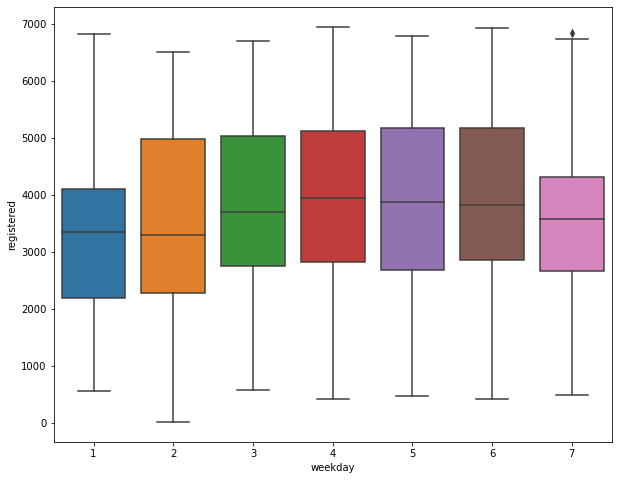

In [46]:
sns.boxplot(y= "registered", x="weekday", data = df) ;

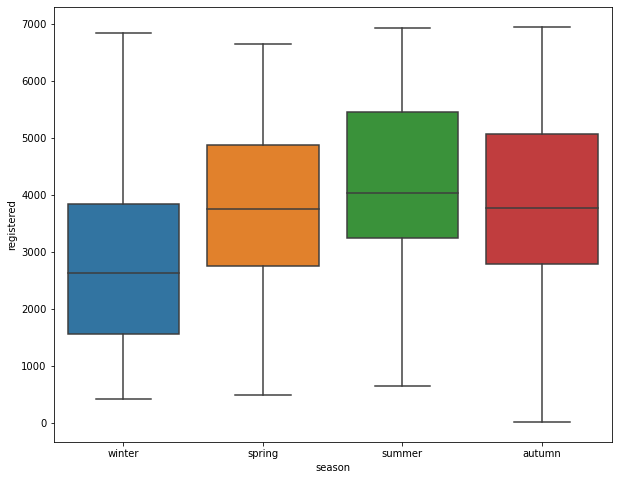

In [47]:
sns.boxplot(y= "registered", x="season", data = df) ;

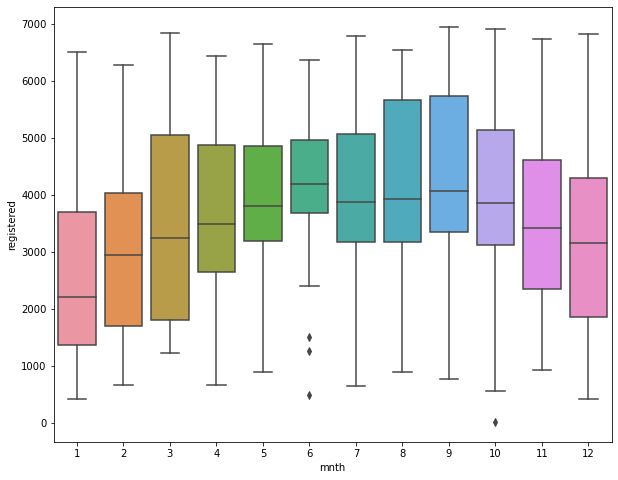

In [48]:
sns.boxplot(y= "registered", x="mnth", data = df) ;

In [41]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,winter,0,1,1,1,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-02-01,winter,0,2,0,4,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-03-01,winter,0,3,0,4,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-04-01,spring,0,4,0,7,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-05-01,spring,0,5,0,2,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Eliminamos las columnas **dteday**, porque lo que nos aporta se refleja en otras columnas, **temp**, porque su información es redundante con *atemp*, y **cnt** y **casual** porque hemos decidido quedarnos con *registered*

In [42]:
df.drop(["dteday", "temp", "cnt", "casual"], axis=1, inplace= True)

In [43]:
df.head(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,registered
0,winter,0,1,1,1,0,2,18.18125,80.5833,10.749882,654
1,winter,0,2,0,4,1,2,17.68695,69.6087,16.652113,670


In [44]:
df.to_csv("datos/03-bikes_limpio.csv")